# Faster Python

In [7]:
import requests
import json

def where(city):
    r = requests.get(
        'https://maps.googleapis.com/maps/api/geocode/json',
        params={"address": city}
    ).content
    return json.loads(r)['results'][0]['geometry']['location']

%timeit 
[where(thing) for thing in
    ['London', 'Berlin', 'Milan', 'my plane ticket', 'my keys']
]

[{'lat': 51.5073509, 'lng': -0.1277583},
 {'lat': 52.52000659999999, 'lng': 13.404954},
 {'lat': 45.4642035, 'lng': 9.189982},
 {'lat': 2.2017546, 'lng': 102.248998},
 {'lat': 40.1527249, 'lng': -76.6073}]

In [8]:
import asyncio
import aiohttp
import json

async def where(city):
    async with aiohttp.ClientSession() as session:
        r = await session.get(
            'https://maps.googleapis.com/maps/api/geocode/json',
            params={"address": city})
        c = await r.text()
        return json.loads(c)['results'][0]['geometry']['location']

inputs = ['London', 'Berlin', 'Milan', 'my plane ticket', 'my keys']

loop = asyncio.get_event_loop()
tasks = [loop.create_task(where(thing)) for thing in inputs]
loop.run_until_complete(asyncio.gather(*tasks))

[{'lat': 51.5073509, 'lng': -0.1277583},
 {'lat': 52.52000659999999, 'lng': 13.404954},
 {'lat': 45.4642035, 'lng': 9.189982},
 {'lat': 2.2017546, 'lng': 102.248998},
 {'lat': 40.1527249, 'lng': -76.6073}]

# Advanced Metaphors

In [9]:
# pre-intro

# top-level fucntion, syntax -> "dunder" method, data model method
#
# x + y                         __add__
# x - y                         __sub__
# len(x)                        __len__
# repr(x)                       __repr__
# x()                           __call__
# getattr(x, a)                 __getattr__

class Polynomial:
    def __init__(self, *coeffs):
        self.coeffs = coeffs

    def __add__(self, other):
        return Polynomial(*(x + y for x, y in zip(self.coeffs, other.coeffs)))

    def __len__(self):
        return len(self.coeffs) - 1

    def __repr__(self):
        return 'Polynomial(*{!r})'.format(self.coeffs)

p1 = Polynomial(4, 5, 1) # 4x² + 5x + 1
p2 = Polynomial(3, 2, 3)

print(p1 + p2)

Polynomial(*(7, 7, 4))


In [10]:
# context managers

from sqlite3 import connect
from contextlib import contextmanager

@contextmanager
def temptable(cur):
    cur.execute('create table temp (x int, y int);')
    try:
        yield
    finally:
        cur.execute('drop table temp;')

with connect('test.db') as conn:
    cur = conn.cursor()
    with temptable(cur):
        for x, y in zip(range(10), range(10, 20)):
            cur.execute('insert into temp (x, y) values (?, ?);', (x, y))
        for row in cur.execute('select * from temp'):
            print(row)

(0, 10)
(1, 11)
(2, 12)
(3, 13)
(4, 14)
(5, 15)
(6, 16)
(7, 17)
(8, 18)
(9, 19)


# Advanced Python

In [11]:
# defaultdict
from collections import defaultdict
my_dict = defaultdict(lambda: 'Default Value')
my_dict['a'] = 42
my_dict['a']
my_dict['b']

'Default Value'

In [12]:
# trees with defaultdict
from collections import defaultdict
import json

def tree():
    return defaultdict(tree)

root = tree()
root['Page']['Python']['defaultdict']['Title'] = "Thing A"
root['Page']['Python']['defaultdict']['Subtitle'] = "Thing B"
root['Page']['Java'] = None
print(json.dumps(root, indent=4))

{
    "Page": {
        "Python": {
            "defaultdict": {
                "Title": "Thing A",
                "Subtitle": "Thing B"
            }
        },
        "Java": null
    }
}


In [13]:
# kind of like expand.grid
from itertools import permutations
for p in permutations(['a', 'b', 'c', 'd']):
    print(p)

# combinations
from itertools import combinations
for c in combinations([1, 2, 3, 4], 2):
    print(c)

('a', 'b', 'c', 'd')
('a', 'b', 'd', 'c')
('a', 'c', 'b', 'd')
('a', 'c', 'd', 'b')
('a', 'd', 'b', 'c')
('a', 'd', 'c', 'b')
('b', 'a', 'c', 'd')
('b', 'a', 'd', 'c')
('b', 'c', 'a', 'd')
('b', 'c', 'd', 'a')
('b', 'd', 'a', 'c')
('b', 'd', 'c', 'a')
('c', 'a', 'b', 'd')
('c', 'a', 'd', 'b')
('c', 'b', 'a', 'd')
('c', 'b', 'd', 'a')
('c', 'd', 'a', 'b')
('c', 'd', 'b', 'a')
('d', 'a', 'b', 'c')
('d', 'a', 'c', 'b')
('d', 'b', 'a', 'c')
('d', 'b', 'c', 'a')
('d', 'c', 'a', 'b')
('d', 'c', 'b', 'a')
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


# Level Up Jupyter

In [14]:
from tqdm import tqdm 
from time import sleep
for i in tqdm(range(1000)):
    sleep(0.01)

100%|██████████| 1000/1000 [00:11<00:00, 86.89it/s]


In [20]:
%%writefile some_code.py

import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

rs = np.random.RandomState(42)
x = rs.gamma(2, size = 1000)
y = -0.5 *x + rs.normal(size = 1000)

sns.jointplot(x, y, kind = "hex", stat_func = kendalltau)
plt.show()

Overwriting some_code.py


In [21]:
%pycat some_code.py

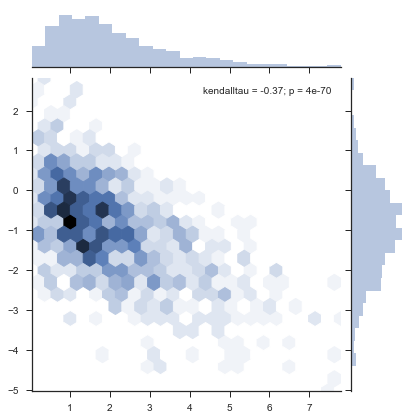

In [22]:
%matplotlib inline
%run some_code.py

# Bayesian Bootstrap

In [23]:
! pip install bayesian_bootstrap

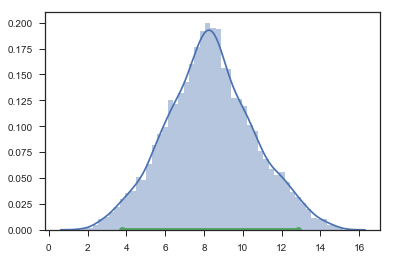

In [24]:
import numpy as np

X = np.random.exponential(7, 4)
X

import bayesian_bootstrap.bootstrap as bbs

posterior_samples = bbs.mean(X, 10000)
l, r = bbs.highest_density_interval(posterior_samples)

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(posterior_samples, label = "Bayesian Bootstrap Samples")
plt.plot([l, r], [0, 0], linewidth = 5.0, marker='o', label='95% HDI')

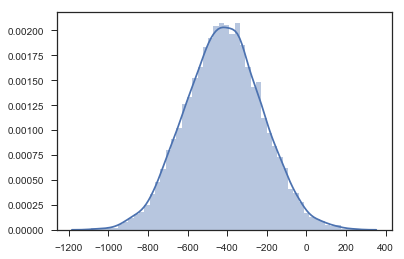

In [26]:
three = np.array([18300, 19200, 18200, 18300, 17700, 18500, 18800, 18800, 18200, 18500])
three_ps = bbs.bayesian_bootstrap(three, np.mean, 10000, 100)

five = np.array([18200, 18000, 18000, 18300, 17700, 17300, 18800, 18500, 17500])
five_ps = bbs.bayesian_bootstrap(five, np.mean, 10000, 100)

diff = (np.array(five_ps) - np.array(three_ps))

sns.distplot(diff, label = "Bayesian Bootstrap Samples")

# help(bbs.bayesian_bootstrap)

# Introduction to Dask

In [33]:
# basics ----

from time import sleep
from dask import delayed

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

inc(10)
add(10, 20)
inc(20)

21

In [34]:
%%time
# just builds the graph
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 351 µs, sys: 95 µs, total: 446 µs
Wall time: 402 µs


In [35]:
%%time
# this is the computation part
z.compute()

CPU times: user 5.84 ms, sys: 3.4 ms, total: 9.24 ms
Wall time: 2.01 s


5

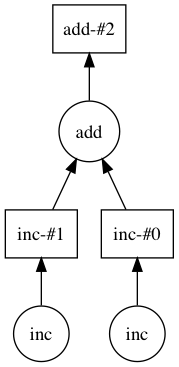

In [36]:
# pip install graphviz
# brew install graphviz
z.visualize()

In [38]:
# parallelize a for loop
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [39]:
%%time
results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 9.49 ms, sys: 4.12 ms, total: 13.6 ms
Wall time: 8.03 s


In [40]:
%%time
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results) # this is it
total.compute()

total.visualize()

CPU times: user 6.58 ms, sys: 8.3 ms, total: 14.9 ms
Wall time: 1.04 s


In [41]:
# parallelizing with control flow
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [i for i in range(10)]

In [42]:
%%time
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

70
CPU times: user 10.6 ms, sys: 4.42 ms, total: 15 ms
Wall time: 10 s


In [43]:
%%time
results = []
for x in data:
    if is_even(x):
        y = delayed(double)(x)
    else:
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
total.compute()
total.visualize()

CPU times: user 8.65 ms, sys: 8.95 ms, total: 17.6 ms
Wall time: 2.05 s
